# Comparing models

##### The goals of this notebook:
- find the best polynomial degree for polynomial regression by testing empirically
- find the best number of layers and neurons per layer for neural network
- compare the models found for polynomial regression and neuralnetwork

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [2]:
# Import data
df = pd.read_csv("cleaned_data.csv")

df

,Time,Cases,Close,next_Close
0,0,0,4352.100098,4315.410156
1,1,0,4324.770020,4322.740234
2,2,0,4344.259766,4300.080078
3,5,0,4246.680176,4294.100098
4,6,0,4323.930176,4359.759766
...,...,...,...,...
513,747,534790,5299.080078,5146.870117
514,748,542262,5287.819824,5209.259766
515,749,546782,5339.259766,5229.529785
516,750,559587,5297.140137,5151.890137


In [3]:
"""
Selecting the features(X) and the label(y)
    Label: "Close"
    Features: "Time", "Cases", "old_Close"
"""

y = df["next_Close"].to_numpy()
X = df[["Time","Cases","Close"]].to_numpy().reshape(-1,3)

#### Polynomial model
The next part consists of finding the best degree for polynomial model

In [4]:
# Split the dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42) #The answer

# Define a list of polynomial degrees
degrees = list(range(1,10))

# These variables are for storing the errors for each polynomial degree
poly_tr_errors = []
poly_val_errors = []

# Loop over the degrees
for i, degree in enumerate(degrees):
    lin_regr = LinearRegression()

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)

    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)

    poly_tr_errors.append(tr_error)
    poly_val_errors.append(val_error)

    



In [5]:
print("{:<10s}{:<20s}{:<20s}".format("Degree", "Training error", "Validation error"))
for i in range(len(degrees)):
    print("{:<10d}{:<20.0f}{:<20.0f}".format(degrees[i], poly_tr_errors[i], poly_val_errors[i]))

Degree    Training error      Validation error    
1         14181               20530               
2         11837               16988               
3         8918                12060               
4         16861               21722               
5         17108               26644               
6         15036               30596               
7         20192               33972               
8         68167               215979              
9         105005              191236              


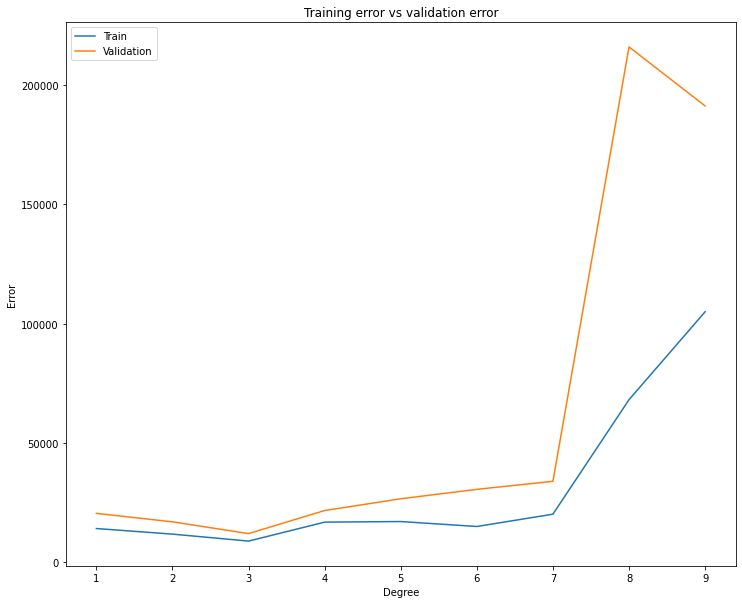

In [6]:
plt.figure(figsize=(12, 10))

plt.plot(degrees, poly_tr_errors, label = 'Train')
plt.plot(degrees, poly_val_errors,label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

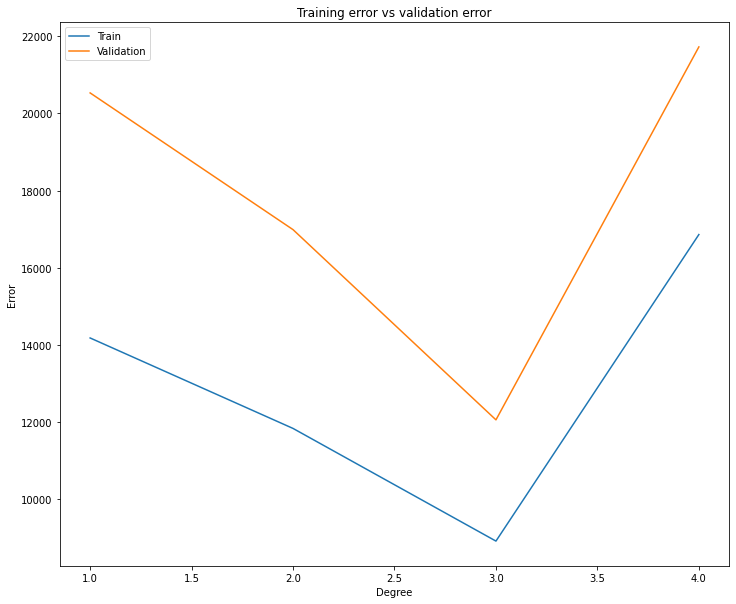

In [7]:
plt.figure(figsize=(12, 10))

n = 4
plt.plot(degrees[0:n], poly_tr_errors[0:n], label = 'Train')
plt.plot(degrees[0:n], poly_val_errors[0:n],label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

#### Neural Network
The next part consists of finding the best number of layers and neuron per layer

In [8]:
# define a list of values for the number of layers and neurons per layer
num_layers = [1,2,4,6,8,10,15,20,25,30]
num_neurons = list(range(10,16))

# These variables are for storing the errors for each polynomial degree
mlp_tr_errors = []
mlp_val_errors = []

for i, layer in enumerate(num_layers):
    tr_error_row = []
    val_error_row = []
    for neuron in num_neurons:
        hidden_layer_size = tuple([neuron]*layer)

        mlp_regr = MLPRegressor(random_state=42, max_iter=10000, hidden_layer_sizes=hidden_layer_size)

        mlp_regr.fit(X_train, y_train)

        y_pred_train = mlp_regr.predict(X_train)
        tr_error = mean_squared_error(y_train, y_pred_train)
        y_pred_val = mlp_regr.predict(X_val)
        val_error = mean_squared_error(y_val, y_pred_val)

        tr_error_row.append(tr_error)
        val_error_row.append(val_error)

    mlp_tr_errors.append(tr_error_row)
    mlp_val_errors.append(val_error_row)


In [9]:
for j in range (len(num_layers)):
    print("{:<10s}{:<20s}{:<20s}".format("Neurons", "Training error", "Validation error. Layers: " + str(num_layers[j]) ))
    for i in range(len(num_neurons)):
        print("{:<10d}{:<20.0f}{:<20.0f}".format(num_neurons[i], mlp_tr_errors[j][i], mlp_val_errors[j][i]))

Neurons   Training error      Validation error. Layers: 1
10        15424               21131               
11        17923               25548               
12        20999               27950               
13        19797               24202               
14        15986               20501               
15        23093               33437               
Neurons   Training error      Validation error. Layers: 2
10        16647               22133               
11        14108               20453               
12        16764               22026               
13        15877               21290               
14        16032               20803               
15        15813               22899               
Neurons   Training error      Validation error. Layers: 4
10        13366470            14849964            
11        25085               34787               
12        15031               22790               
13        15183               21040               
14        

In [10]:
print("{:<10s}{:<20s}{:<20s}".format("Leyers", "Training error", "Validation error. Neurons:" + str(num_neurons[3]) ))
for i in range(len(num_layers)):
    print("{:<10d}{:<20.0f}{:<20.0f}".format(num_layers[i], mlp_tr_errors[i][3], mlp_val_errors[i][3]))

Leyers    Training error      Validation error. Neurons:13
1         19797               24202               
2         15877               21290               
4         15183               21040               
6         14535               20421               
8         25698               27309               
10        16664               21450               
15        14206               20773               
20        15562               21870               
25        14334               21344               
30        13861               20179               


In [11]:
# Plotting with a good value for number of neurons
# 13 neurons seems to result in good error consistently

num_layers = list(range(1,30))
num_neurons = 13 # 13 neurons seems to result in good error consistently

mlp_tr_errors = []
mlp_val_errors = []

for num in num_layers:
    hidden_layer_size = tuple([num_neurons]*num)
    
    mlp_regr = MLPRegressor(random_state= 42, hidden_layer_sizes= hidden_layer_size, max_iter=50000)
    mlp_regr.fit(X_train, y_train)

    y_pred_train = mlp_regr.predict(X_train)
    tr_error = mean_squared_error(y_train, y_pred_train)
    y_pred_val = mlp_regr.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred_val)

    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)


print("{:<10s}{:<20s}{:<20s}".format("Leyers", "Training error", "Validation error"))
for i in range(len(num_layers)):
    print("{:<10d}{:<20.0f}{:<20.0f}".format(num_layers[i], mlp_tr_errors[i], mlp_val_errors[i]))


Leyers    Training error      Validation error    
1         19797               24202               
2         15877               21290               
3         15599               21555               
4         15183               21040               
5         15625               21440               
6         14535               20421               
7         22885               30637               
8         25698               27309               
9         15853               22089               
10        16664               21450               
11        17291               26214               
12        14444               20497               
13        14941               21222               
14        15025               21646               
15        14206               20773               
16        16072               24191               
17        11287778            11942672            
18        15435               22160               
19        15106               2

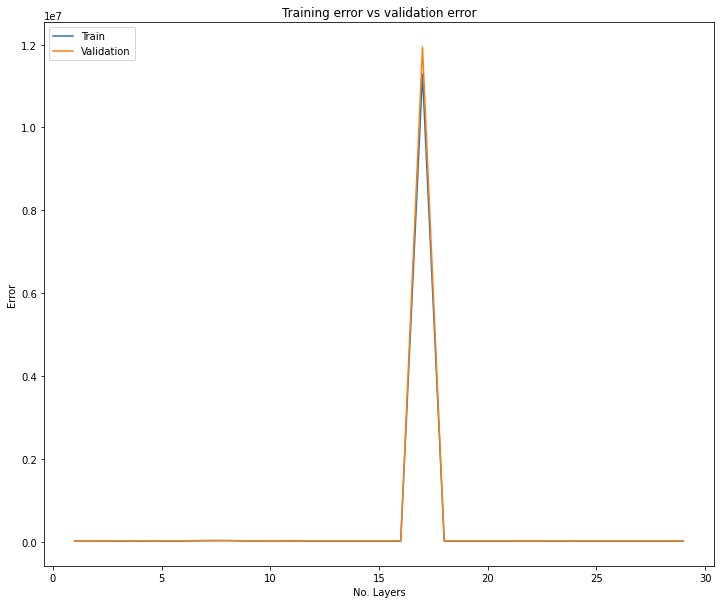

In [12]:
plt.figure(figsize=(12, 10))

plt.plot(num_layers, mlp_tr_errors, label = 'Train')
plt.plot(num_layers, mlp_val_errors,label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('No. Layers')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

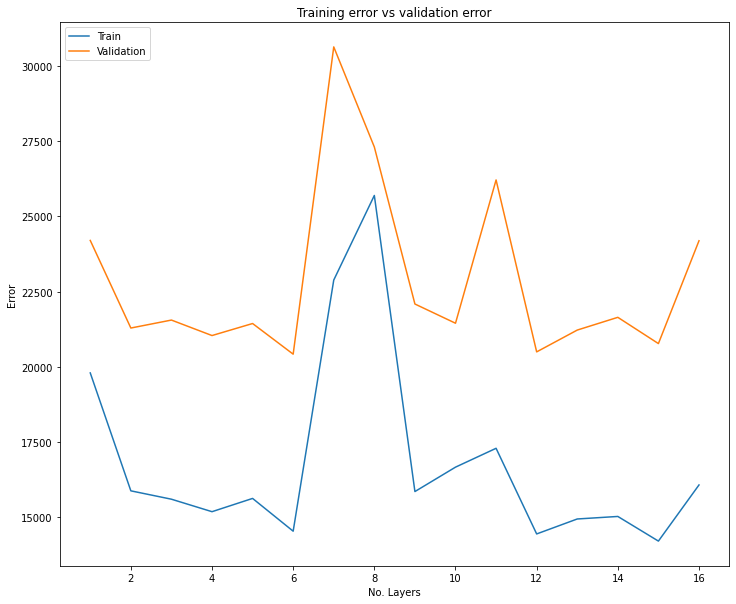

In [13]:
plt.figure(figsize=(12, 10))

n = 16

plt.plot(num_layers[0:n], mlp_tr_errors[0:n], label = 'Train')
plt.plot(num_layers[0:n], mlp_val_errors[0:n],label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('No. Layers')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

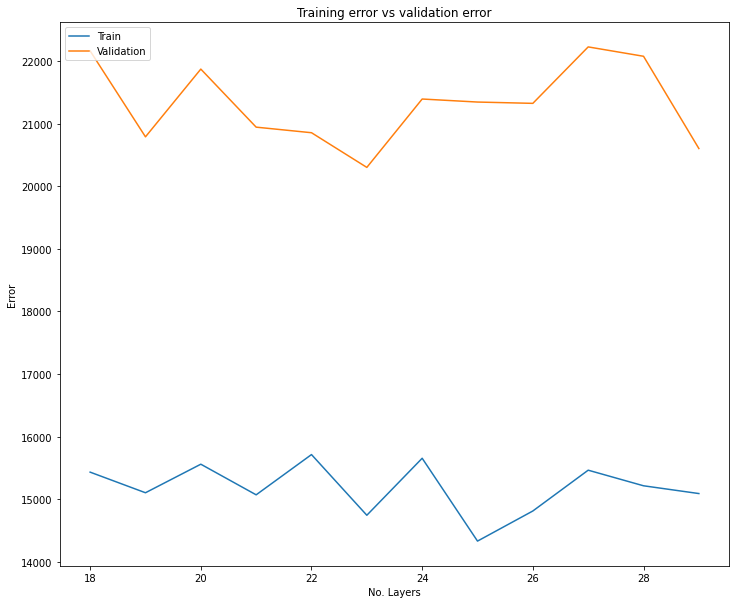

In [14]:
plt.figure(figsize=(12, 10))

n = 17

plt.plot(num_layers[n:], mlp_tr_errors[n:], label = 'Train')
plt.plot(num_layers[n:], mlp_val_errors[n:],label = 'Validation')
plt.legend(loc = 'upper left')

plt.xlabel('No. Layers')
plt.ylabel('Error')
plt.title('Training error vs validation error')
plt.show()

In [15]:
mlp_errors = {"Layers": num_layers, "mlp_tr_errors": mlp_tr_errors, "mlp_val_errors": mlp_val_errors}

pd.DataFrame(mlp_errors)

,Layers,mlp_tr_errors,mlp_val_errors
0,1,1.979702e+04,2.420233e+04
1,2,1.587671e+04,2.128984e+04
2,3,1.559855e+04,2.155466e+04
3,4,1.518346e+04,2.104000e+04
4,5,1.562451e+04,2.143985e+04
5,6,1.453505e+04,2.042103e+04
6,7,2.288476e+04,3.063687e+04
7,8,2.569767e+04,2.730929e+04
8,9,1.585307e+04,2.208851e+04
9,10,1.666426e+04,2.144953e+04


In [19]:
# Trying with varying number of neuron in each layer

layers=[(50,40,30,20,10),
        (42,32,16,8,4),
        (53,57,43,41,37,31,29,23,19,17,13,11),
        (60,30,15),
        (60,45,30,15),
        (30,15,15,10,10,5,5,5),
        (53,57,43,41,37,31,29,23,19,17,13,11,7,5,3,2),
        (30,15,15,15,5,5,5,5,5,5,5),
        (15,15,15,15,10,10,5,5),
        (15,15,5,5,5,5)
        ]

mlp_tr_errors = []
mlp_val_errors = []

for layer in layers:

    mlp_regr = MLPRegressor(random_state= 42, hidden_layer_sizes= layer, max_iter=1000)
    mlp_regr.fit(X_train, y_train)

    y_pred_train = mlp_regr.predict(X_train)
    tr_error = mean_squared_error(y_train, y_pred_train)
    y_pred_val = mlp_regr.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred_val)

    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)

mlp_errors = {"Layers": layers, "mlp_tr_errors": mlp_tr_errors, "mlp_val_errors": mlp_val_errors}

pd.DataFrame(mlp_errors).round(0)

,Layers,mlp_tr_errors,mlp_val_errors
0,"(50, 40, 30, 20, 10)",733020.0,795260.0
1,"(42, 32, 16, 8, 4)",15276.0,20249.0
2,"(53, 57, 43, 41, 37, 31, 29, 23, 19, 17, 13, 11)",14576.0,19829.0
3,"(60, 30, 15)",33084.0,44687.0
4,"(60, 45, 30, 15)",15514.0,22067.0
5,"(30, 15, 15, 10, 10, 5, 5, 5)",15852.0,21574.0
6,"(53, 57, 43, 41, 37, 31, 29, 23, 19, 17, 13, 1...",14961.0,20386.0
7,"(30, 15, 15, 15, 5, 5, 5, 5, 5, 5, 5)",15664.0,21173.0
8,"(15, 15, 15, 15, 10, 10, 5, 5)",15945.0,21388.0
9,"(15, 15, 5, 5, 5, 5)",16136.0,20884.0
